## Importing Libraries

In [1]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

### **Read the dataset**

In [2]:
df = pd.read_csv('https://query.data.world/s/3cb6wokjorbrh2t3g7l7hyycbskz5g?dws=00000')

### View the first and last 5 rows of the dataset.

In [3]:
df.head()

,Site Name,Department,Year,Current Solar,Electric Utility,Electricity Usage,Peak Electric Demand,Building Type,Building Area,Natural Gas Usage,Energy Use Intensity,Address,Latitude,Longitude
0,PHX Building 139,Aviation,2020,0,APS,1,0,REPAIRSERVICES,3616,0,0.0,2745 E Air Ln,33.44299,-112.02176
1,Old Verde Park Cntr,Parks,2020,0,APS,12,0,UNKNOWN,0,0,NaN,916 E Van Buren St,33.45205,-112.06179
2,North Ranger Station - Old,Parks,2020,0,APS,77,0,OFFICE,0,0,NaN,11659 N 16th St,33.59485,-112.04768
3,Lookout Mountain Trailhead,Parks,2020,0,APS,242,0,OUTDOORREC,0,0,NaN,15415 N 16th St,33.62720,-112.04820
4,Laveen Basin,Parks,2020,0,SRP,317,0,PARK,0,0,NaN,6039 S 43rd Ave,33.39098,-112.14917


In [4]:
df.tail()

,Site Name,Department,Year,Current Solar,Electric Utility,Electricity Usage,Peak Electric Demand,Building Type,Building Area,Natural Gas Usage,Energy Use Intensity,Address,Latitude,Longitude
491,Phoenix City Hall,Public Works,2020,0,APS,10370048,3206,OFFICE,600000,48805,62.42,200 W Washington St,33.44879,-112.07707
492,PHX SkyTrain Switch Yard,Aviation,2020,0,APS,12540154,2189,TRANSPORTATIONTE,0,0,NaN,333 S 42nd St,NaN,NaN
493,PCC North & West Bldgs,Convention,2020,100,APS,14342114,3770,CONVENTION_CN,1766280,297702,42.36,100 N 3rd St,33.44981,-112.07045
494,PHX Terminal 3,Aviation,2020,0,APS,22345870,4277,TRANSPORTATIONTE,880000,0,79.76,3400 E Sky Harbor Blvd,33.43543,-112.00829
495,PHX Terminal 4,Aviation,2020,0,APS,69527895,22957,TRANSPORTATIONTE,1918732,31382,115.45,3800 E Sky Harbor Blvd,33.43549,-111.99787


### Understand the shape of the dataset.

In [5]:
df.shape

(496, 14)

### Check the data types of the columns for the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Site Name             496 non-null    object 
 1   Department            496 non-null    object 
 2   Year                  496 non-null    int64  
 3   Current Solar         496 non-null    int64  
 4   Electric Utility      496 non-null    object 
 5   Electricity Usage     496 non-null    int64  
 6   Peak Electric Demand  496 non-null    int64  
 7    Building Type        496 non-null    object 
 8   Building Area         496 non-null    int64  
 9   Natural Gas Usage     496 non-null    int64  
 10  Energy Use Intensity  280 non-null    float64
 11  Address               496 non-null    object 
 12  Latitude              489 non-null    float64
 13  Longitude             489 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 54.4+ KB


### Summary of the dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,496.0,2020.000000,0.000000e+00,2020.00000,2020.00000,2020.00000,2020.00000,2.020000e+03
Current Solar,496.0,18.570565,2.015732e+02,0.00000,0.00000,0.00000,0.00000,4.100000e+03
Electricity Usage,496.0,536097.439516,3.454466e+06,1.00000,28233.50000,88118.00000,213884.50000,6.952790e+07
Peak Electric Demand,496.0,194.112903,1.115499e+03,0.00000,0.00000,38.00000,104.50000,2.295700e+04
Building Area,496.0,27693.050403,1.374057e+05,0.00000,0.00000,3743.50000,13574.75000,1.918732e+06
Natural Gas Usage,496.0,1785.520161,1.541294e+04,0.00000,0.00000,0.00000,113.25000,2.977020e+05
Energy Use Intensity,280.0,83.157536,1.979584e+02,0.00000,30.34250,46.00000,68.56250,2.055030e+03
Latitude,489.0,33.505784,1.015493e-01,33.29166,33.43824,33.47141,33.58257,3.380608e+01
Longitude,489.0,-112.071781,6.134601e-02,-112.28885,-112.10744,-112.07187,-112.02942,-1.117462e+02


In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
Site Name,496,493,19th Ave Landfill,2
Department,496,15,Parks,220
Electric Utility,496,3,APS,355
Building Type,496,53,PARK,126
Address,496,449,702 W Deer Valley Dr,9


**Let's look at the unqiue values of all the categories**

In [9]:
cols_cat= df.select_dtypes(['object'])

In [10]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Site Name are :
Site Name
19th Ave Landfill             2
Skunk Creek Landfill          2
27th Ave Landfill             2
DVT Hangar 45                 1
Sunnyslope Comm Cntr - Gym    1
                             ..
Muriel Smith Rec Center       1
Encanto 9-Hole Pro Shop       1
Winship House                 1
GR Herberger Park             1
Central Park                  1
Name: count, Length: 493, dtype: int64
**************************************************
Unique values in Department are :
Department
Parks             220
Aviation           69
Fire               69
Public Works       26
Police             24
Housing            22
Library            16
Public Transit     14
Human Services     12
Convention          8
Streets             5
Golf                5
Neighborhood        3
Arts                2
City Clerk          1
Name: count, dtype: int64
**************************************************
Unique values in Electric Utility are :
Electric Utility
APS   

**Dropping columns which are not adding any information.**

In [11]:
df.drop(["Site Name","Address","Year"],axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

### Univariate analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Numerical Columns

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

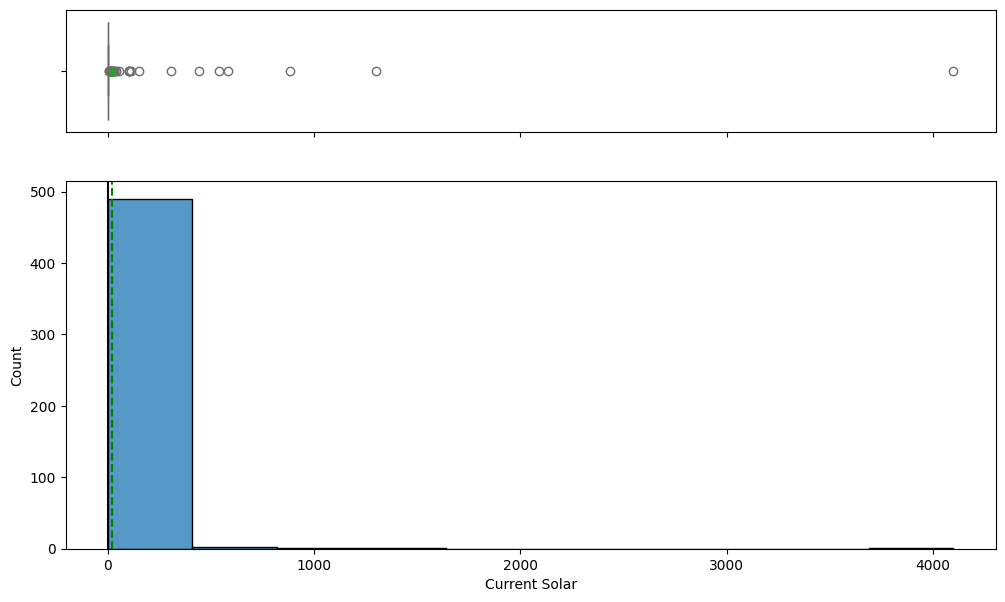

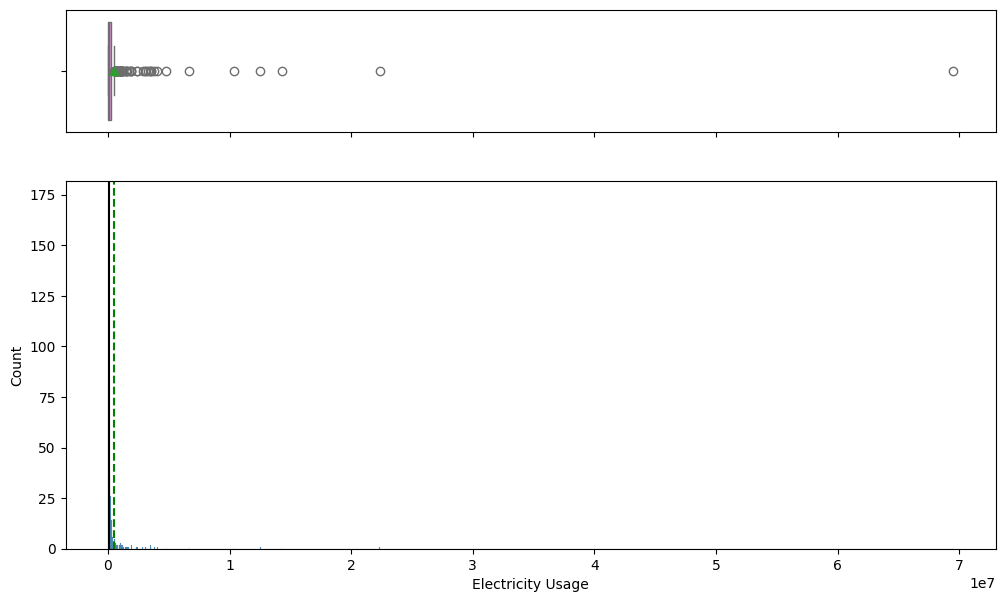

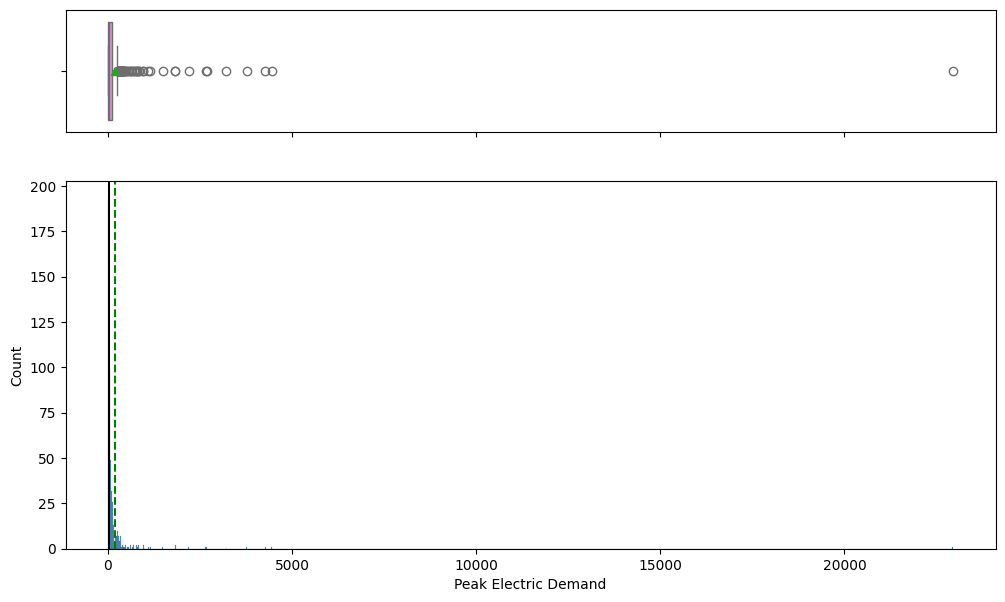

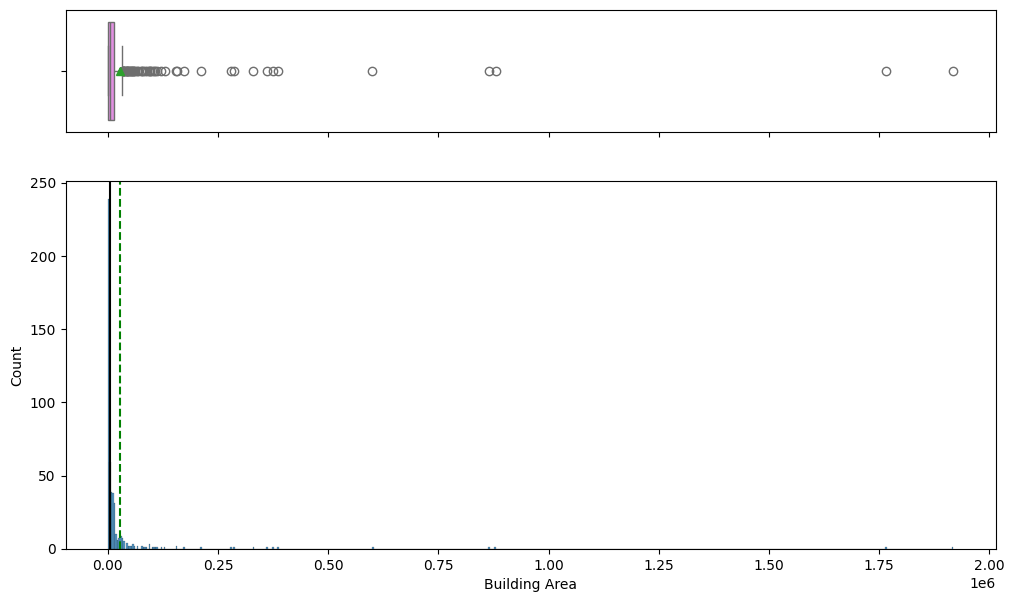

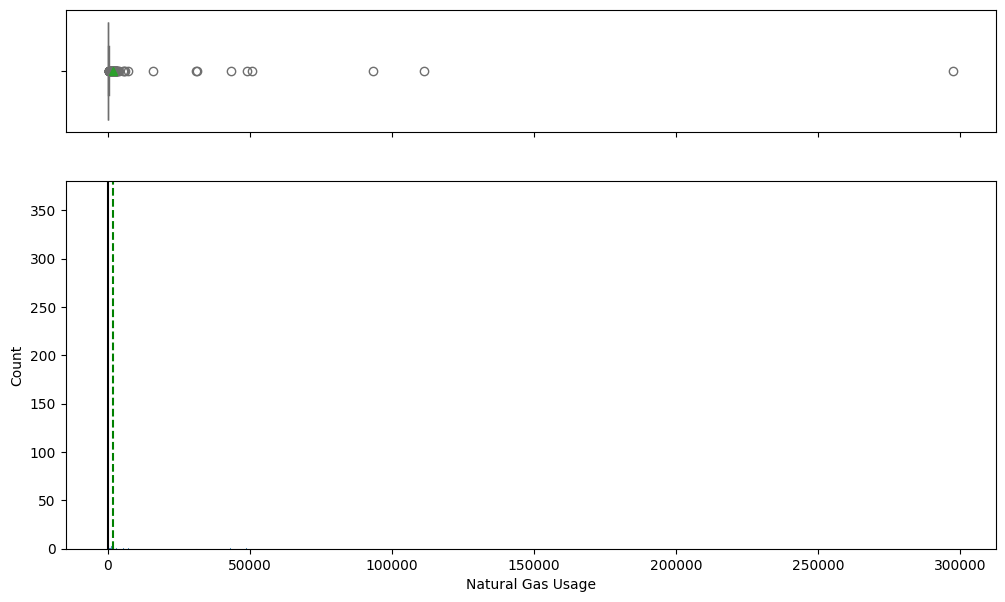

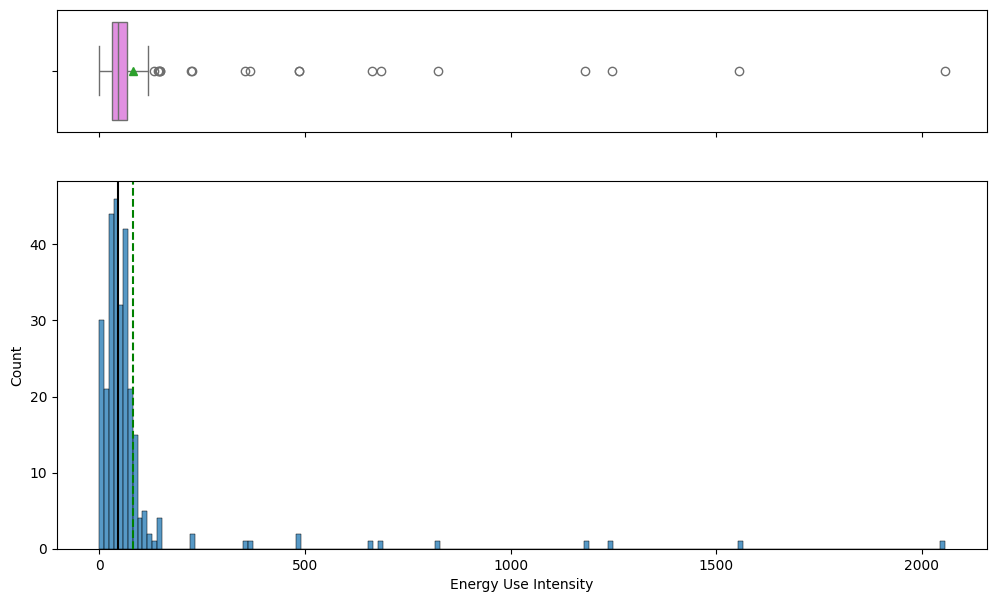

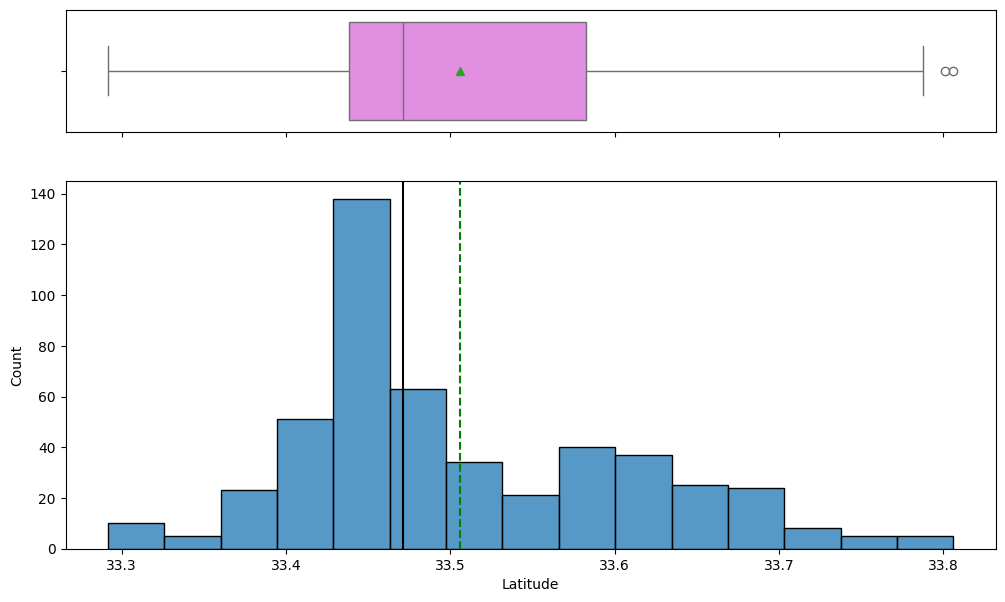

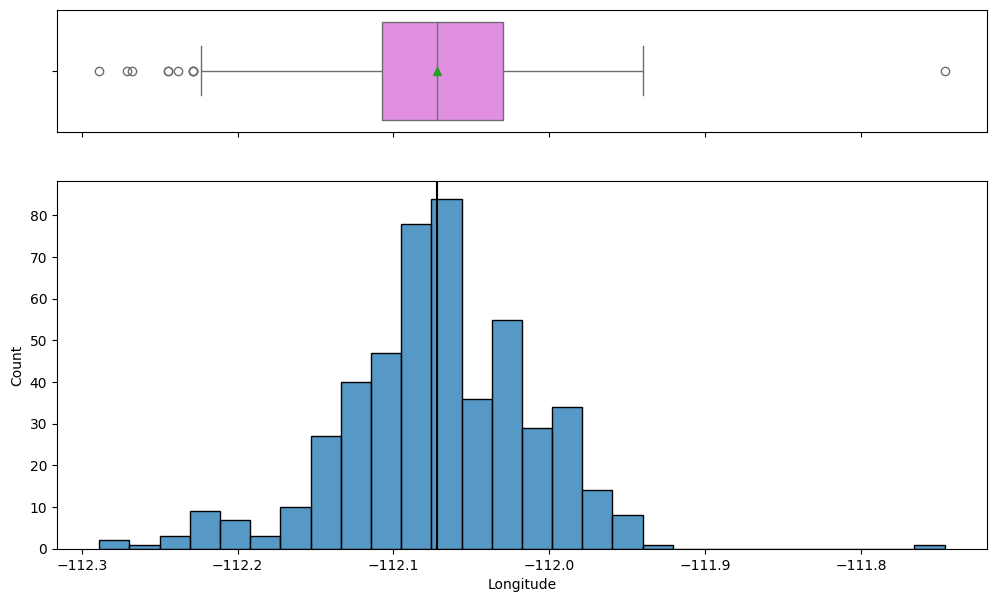

In [13]:
# Strip leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Exclude 'Department' and 'Building Type' if they exist in numerical_columns
numerical_columns = numerical_columns.drop(['Department', 'Building Type','Electric Utility'], errors='ignore')

# Loop through the remaining numerical columns and generate the plots
for feature in numerical_columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

### Categorical Columns

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Department

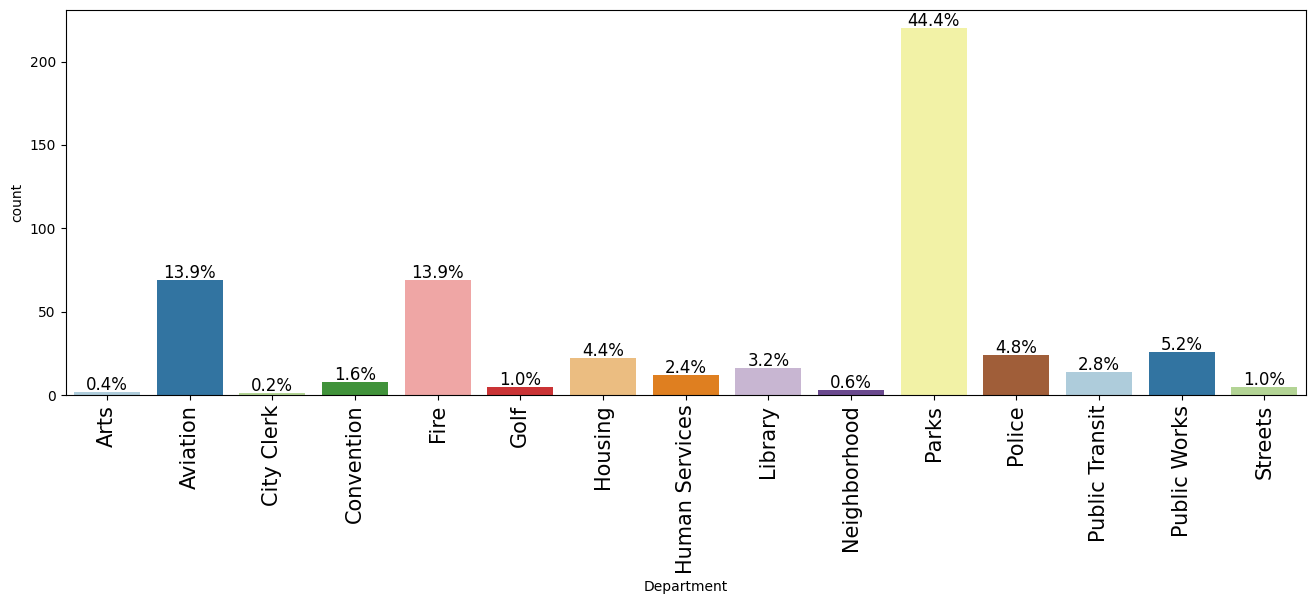

In [15]:
labeled_barplot(df, "Department", perc=True)

### Observations on Building Type

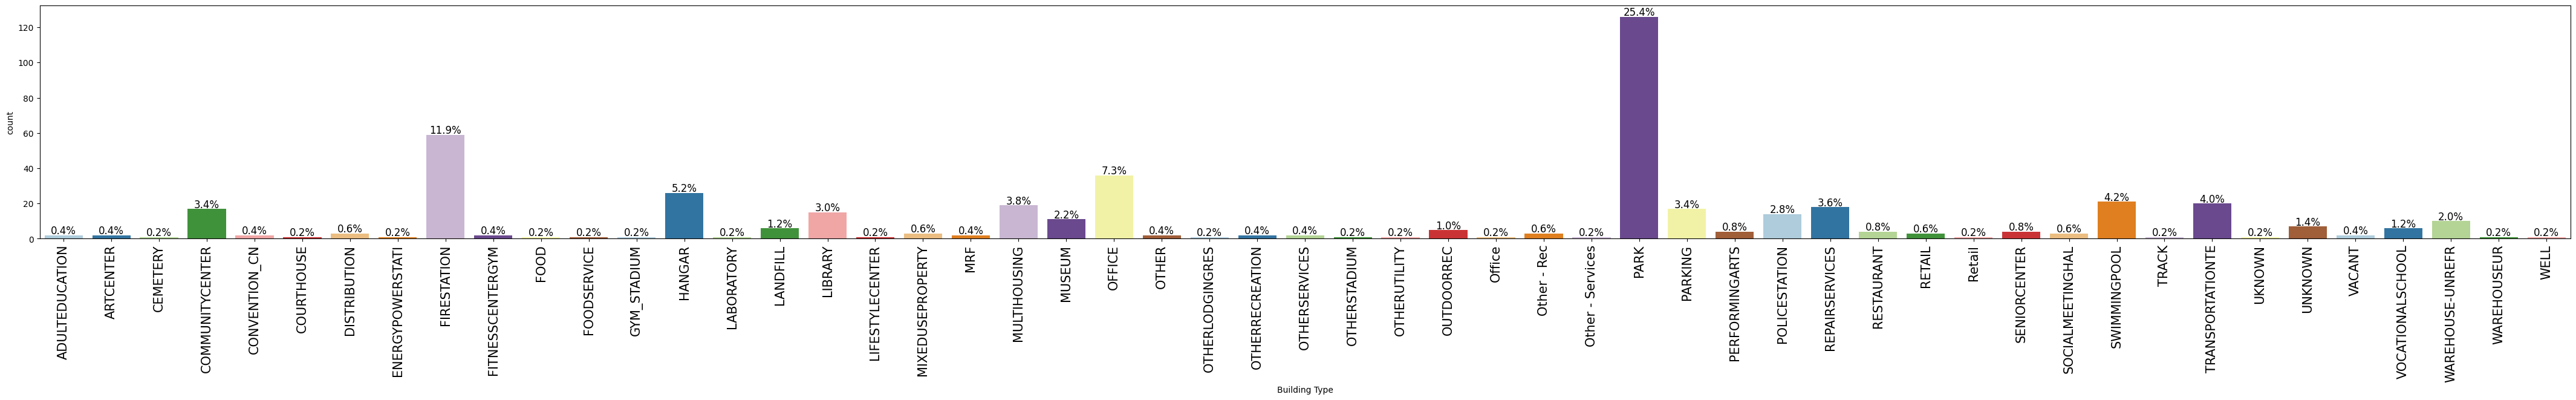

In [16]:
labeled_barplot(df, "Building Type", perc=True)

### Observations on Electric Utility

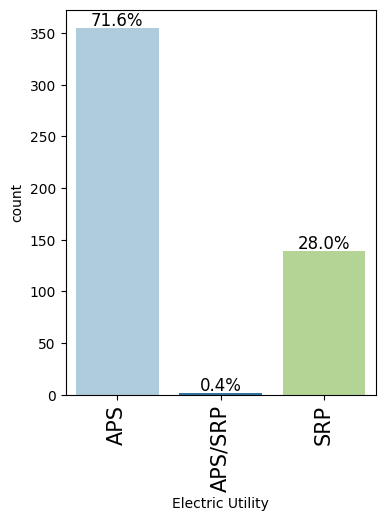

In [17]:
labeled_barplot(df, "Electric Utility", perc=True)

### Geospatial Analysis

In [18]:
# Drop duplicates based on "Latitude" and "Longitude"
df_coords = df.drop_duplicates(subset=["Latitude", "Longitude"])

# Create point geometries from Latitude and Longitude columns
geometry = gpd.points_from_xy(df_coords["Longitude"], df_coords["Latitude"])

# Create a GeoDataFrame using Latitude, Longitude and other columns
geo_df = gpd.GeoDataFrame(
    df_coords[["Latitude", "Longitude"]], geometry=geometry
)

# Preview the geopandas dataframe
geo_df.head()


,Latitude,Longitude,geometry
0,33.44299,-112.02176,POINT (-112.02176 33.44299)
1,33.45205,-112.06179,POINT (-112.06179 33.45205)
2,33.59485,-112.04768,POINT (-112.04768 33.59485)
3,33.62720,-112.04820,POINT (-112.0482 33.6272)
4,33.39098,-112.14917,POINT (-112.14917 33.39098)


In [19]:
# Assuming df_coords is your DataFrame with 'Latitude' and 'Longitude' columns
df_coords_map = folium.Map(prefer_canvas=True)

# Create a list of coordinates, excluding NaN values
df_coords_list = [[row["Latitude"], row["Longitude"]] for idx, row in df_coords.iterrows() if pd.notna(row["Latitude"]) and pd.notna(row["Longitude"])]

# Initialize a MarkerCluster object to handle dense markers
marker_cluster = MarkerCluster().add_to(df_coords_map)

# Iterate through the list and add a marker for each coordinate
for i, coordinates in enumerate(df_coords_list):
    # Dynamic radius adjustment based on some condition (static radius of 5 here)
    radius_value = 5

    # Custom marker style with CircleMarker
    folium.CircleMarker(
        location=coordinates,
        radius=radius_value,  # Adjust radius size if needed
        weight=3,  # Thicker border for better visibility
        popup=f"Coordinates: {coordinates}",  # Popup showing coordinates
        color="darkblue",  # Border color
        fill=True,
        fill_color="lightblue",  # Fill color for better visibility
        fill_opacity=0.6,  # Make the fill semi-transparent
        stroke=True  # Ensure the border (stroke) is visible
    ).add_to(marker_cluster)  # Add to cluster instead of directly on the map

# Calculate the bounds (latitude/longitude range) based on your coordinates
if df_coords_list:  # Check if there are any coordinates in the list
    min_lat = min([coord[0] for coord in df_coords_list])
    max_lat = max([coord[0] for coord in df_coords_list])
    min_lon = min([coord[1] for coord in df_coords_list])
    max_lon = max([coord[1] for coord in df_coords_list])

    # Set the bounds of the map to focus only on the area with blue markers and add padding
    df_coords_map.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]], padding=(50, 50))
else:
    # If no valid coordinates, set a default zoom
    df_coords_map = folium.Map(location=[0, 0], zoom_start=2, prefer_canvas=True)

# Display the map
df_coords_map


## Bivariate And Multivariate Analysis

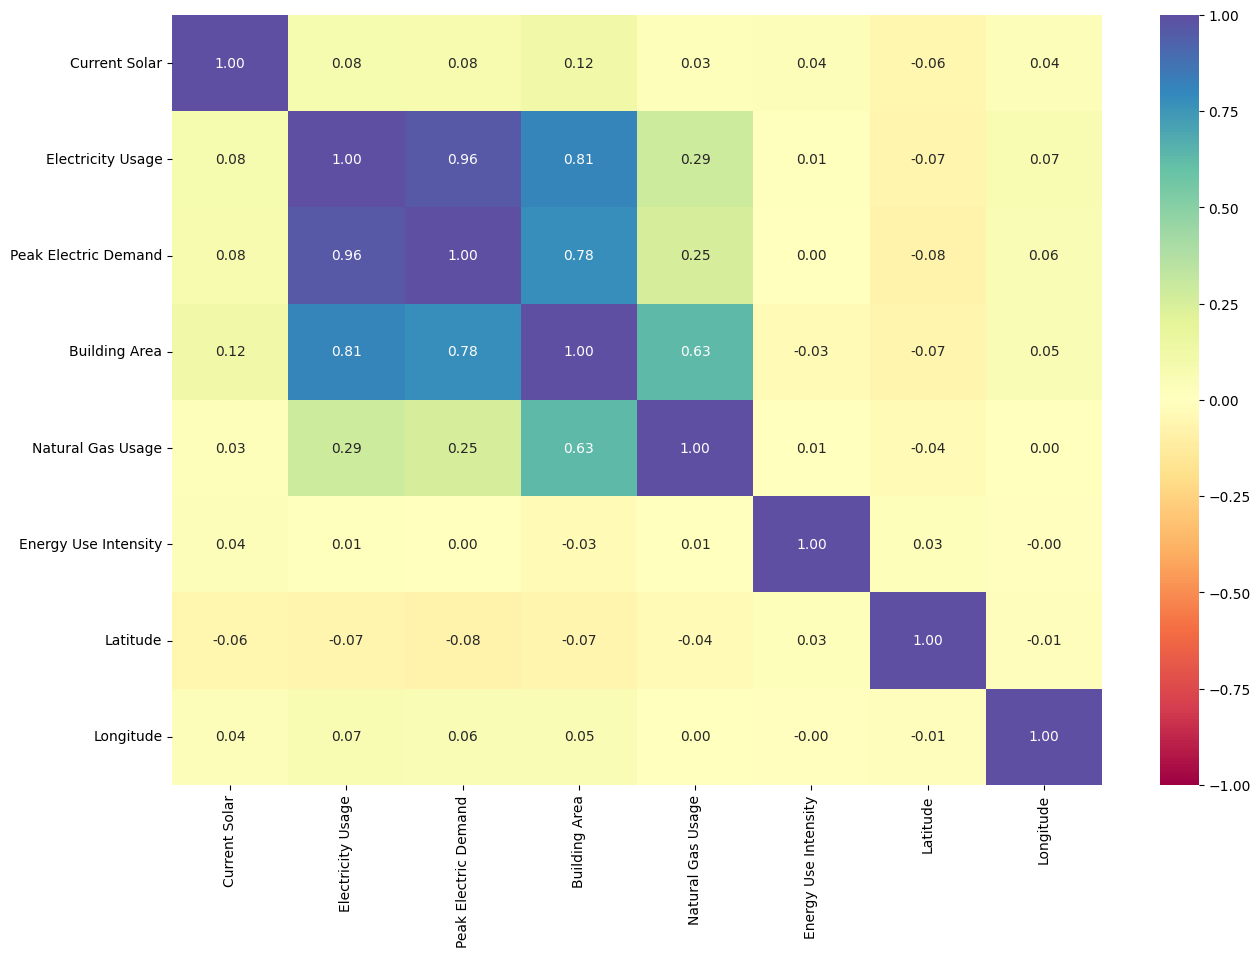

In [20]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Plotting the heatmap with the correlation matrix of the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(),vmin=-1, vmax=1, annot=True, fmt='.2f',cmap="Spectral")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Missing Value Treatment

In [21]:
df.duplicated().sum()

3

## **Drop The Duplicates**

In [22]:
df=df.drop_duplicates()

In [23]:
df.duplicated().sum()

0

We have dropped all the duplicates

In [24]:
df.isnull().sum()

,0
Department,0
Current Solar,0
Electric Utility,0
Electricity Usage,0
Peak Electric Demand,0
Building Type,0
Building Area,0
Natural Gas Usage,0
Energy Use Intensity,213
Latitude,7


In [25]:
# Fill missing values in "Energy Use Intensity" using the mean
df['Energy Use Intensity'].fillna(df['Energy Use Intensity'].mean(), inplace=True)
# Fill missing values in "Latitude" using the mean
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
# Fill missing values in "Longitude" using the mean
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

In [26]:
df.isnull().sum()

,0
Department,0
Current Solar,0
Electric Utility,0
Electricity Usage,0
Peak Electric Demand,0
Building Type,0
Building Area,0
Natural Gas Usage,0
Energy Use Intensity,0
Latitude,0


In [27]:
# we first create a copy of the data to avoid changes to it
df = df.copy()

### Outlier Check

- Let's check for outliers in the data.

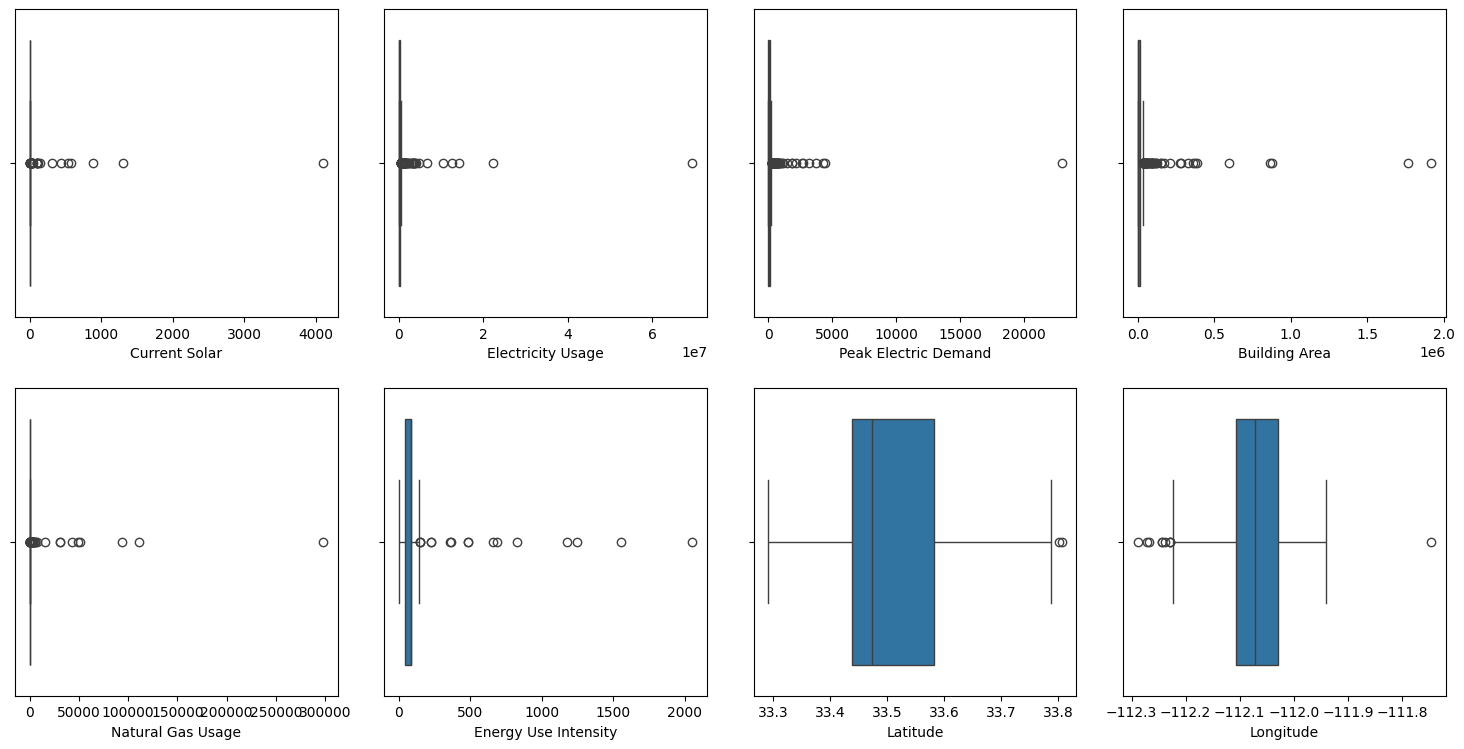

In [28]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Treating Outliers

In [29]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

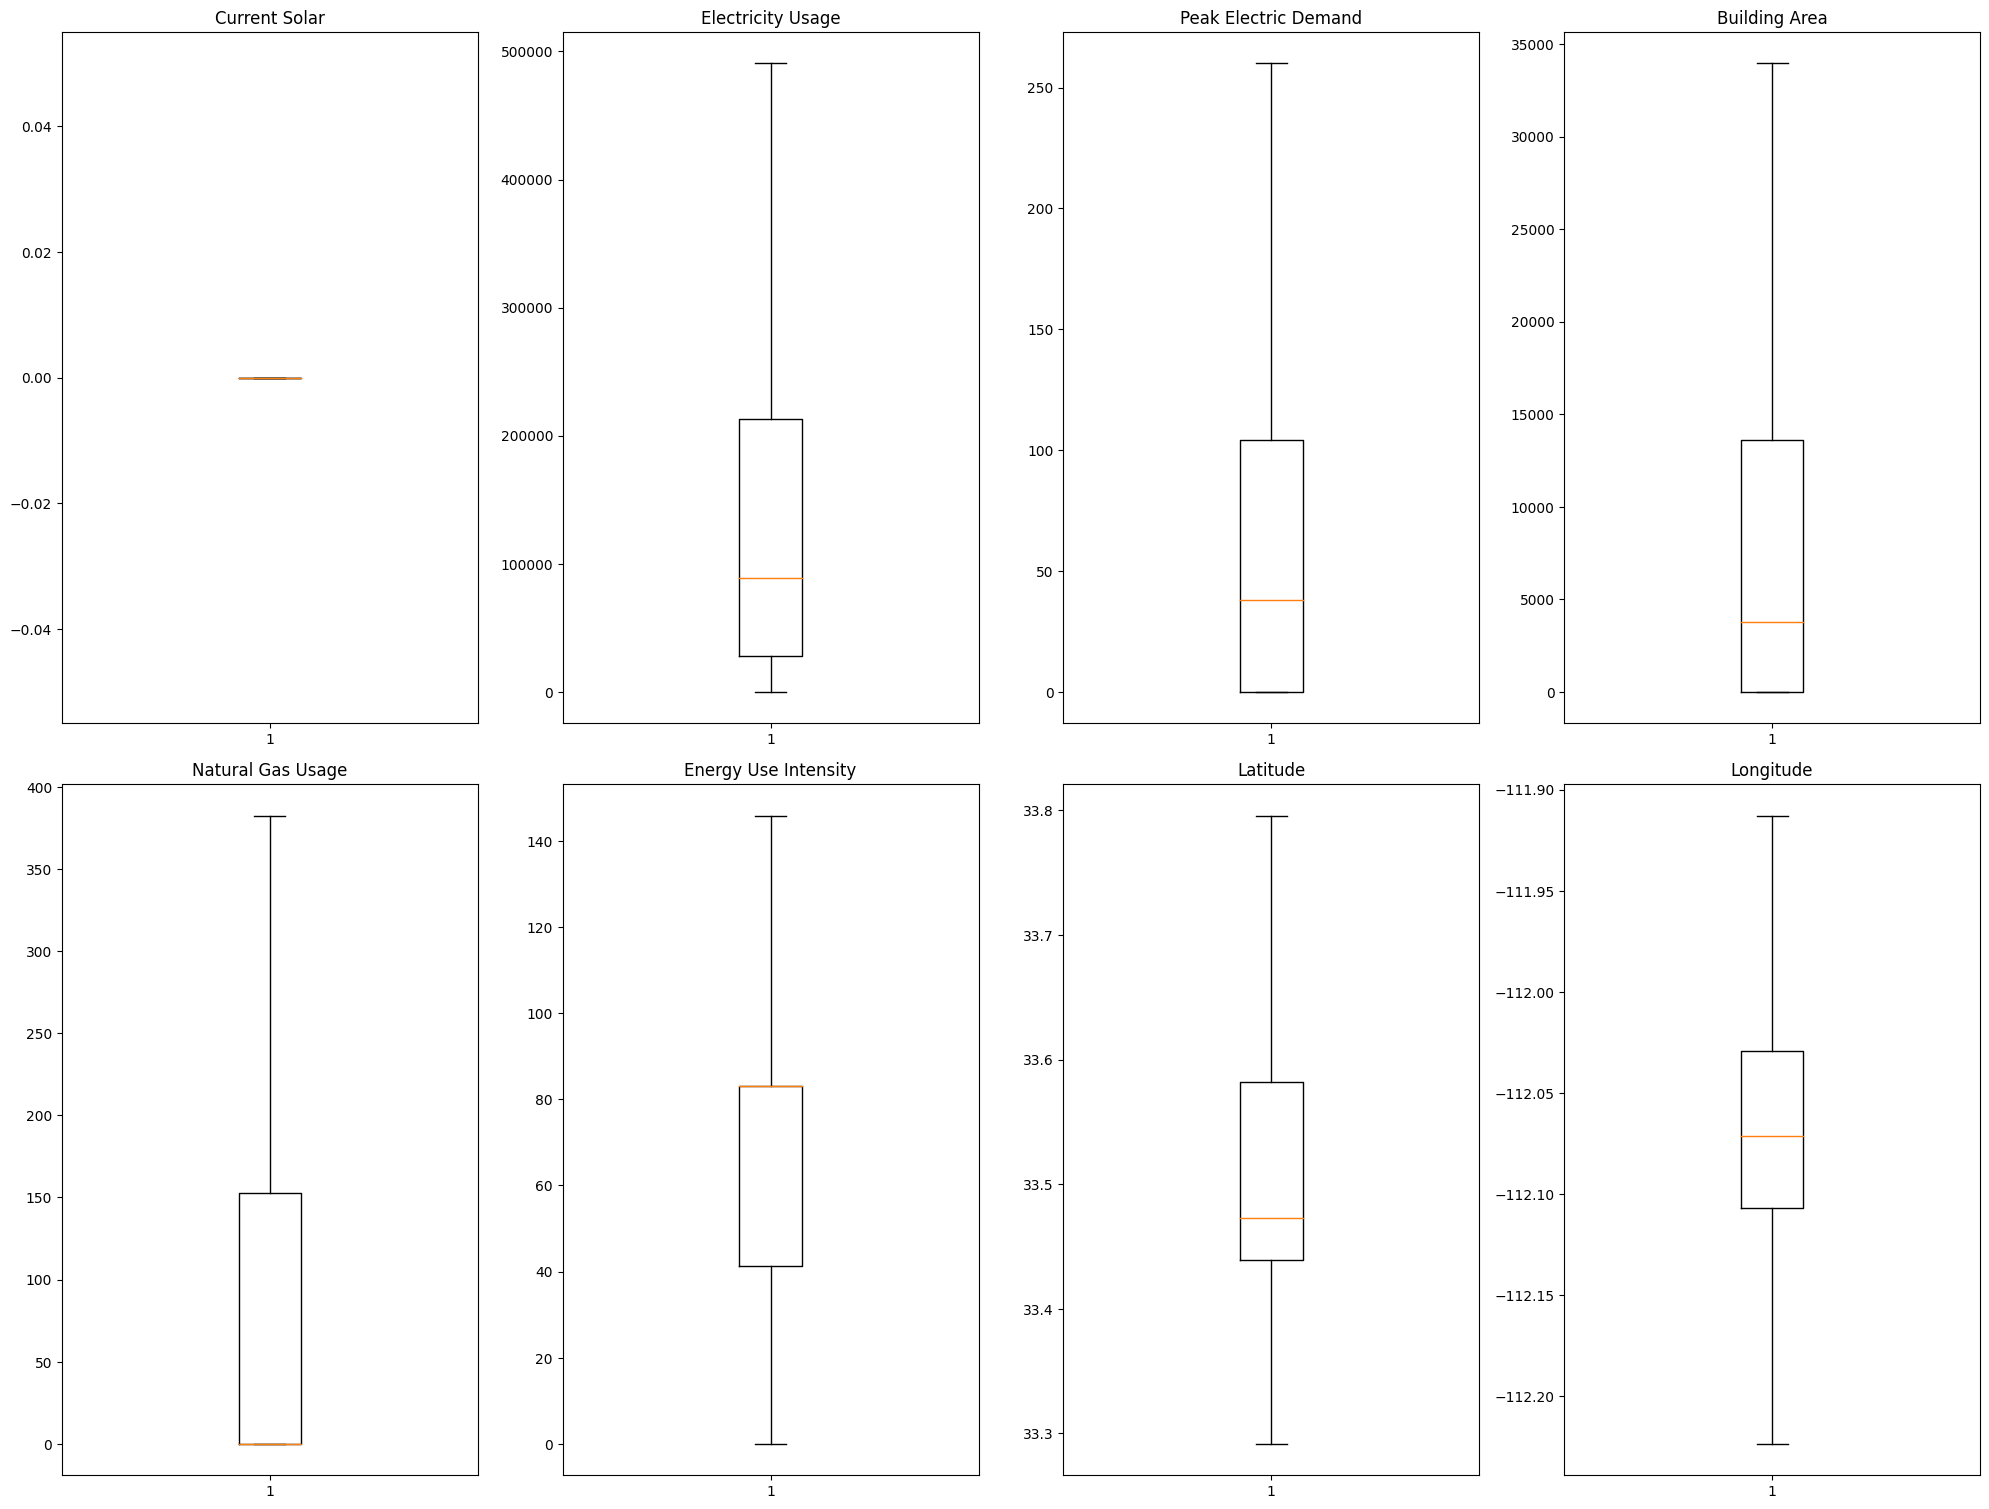

In [30]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Dropping Department,Building Type and Electric Utility columns which are not useful for regression models.**

In [31]:
df.drop(["Department","Building Type","Electric Utility"],axis=1,inplace=True)

## **Split the dataset**

In [32]:
# Separating features and the target column
X = df.drop(['Electricity Usage'], axis=1)
y = df['Electricity Usage']

print(X.head())
print(y.head())

   Current Solar  Peak Electric Demand  Building Area  Natural Gas Usage  \
0              0                     0         3616.0                0.0   
1              0                     0            0.0                0.0   
2              0                     0            0.0                0.0   
3              0                     0            0.0                0.0   
4              0                     0            0.0                0.0   

   Energy Use Intensity  Latitude  Longitude  
0              0.000000  33.44299 -112.02176  
1             83.157536  33.45205 -112.06179  
2             83.157536  33.59485 -112.04768  
3             83.157536  33.62720 -112.04820  
4             83.157536  33.39098 -112.14917  
0      1
1     12
2     77
3    242
4    317
Name: Electricity Usage, dtype: int64


In [33]:
# Splitting the data into train and test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [34]:
X_train.shape, X_test.shape

((394, 7), (99, 7))

## **Building Models**

- We'll fit different models on the train data and observe their performance.
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [35]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [36]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))

    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True:
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

    # returning the list with train and test scores
    return score_list

## Decision Tree Model

In [37]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


In [40]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  83218.219137  49993.656566   0.708833        0.686436  406.952252


### Hyperparameter Tuning

In [41]:
# Choose the type of regressor.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None],
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0.001,
                      min_samples_leaf=3, random_state=1)

In [42]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


In [43]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  84337.897626  47182.197138   0.700945        0.677941  228.273356


**Plotting the feature importance of each variable**

In [44]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Peak Electric Demand  0.723833
Building Area         0.130718
Longitude             0.061292
Latitude              0.047062
Energy Use Intensity  0.035886
Natural Gas Usage     0.001210
Current Solar         0.000000


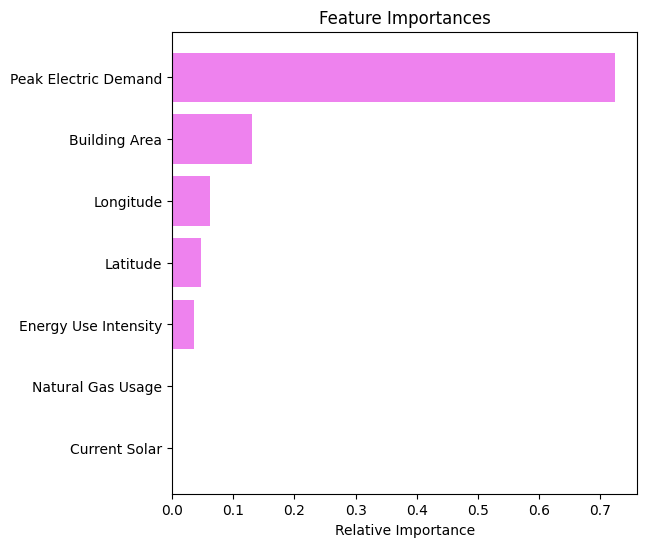

In [45]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Model

In [46]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [47]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  26641.569014  14916.412614   0.974244        0.973777  703.407944


In [48]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  61175.941294  39624.091717    0.84265        0.830546  280.132372


### Hyperparameter Tuning

In [49]:
# Choose the type of regressor.
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=90,
                      random_state=1)

In [50]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared         MAPE
0  30703.130138  19622.584692   0.965792        0.965171  2025.975222


In [51]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  66306.031291  43888.390246   0.815154        0.800935  305.673123


In [52]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Peak Electric Demand  0.425737
Building Area         0.259591
Latitude              0.091773
Energy Use Intensity  0.090581
Longitude             0.078017
Natural Gas Usage     0.054301
Current Solar         0.000000


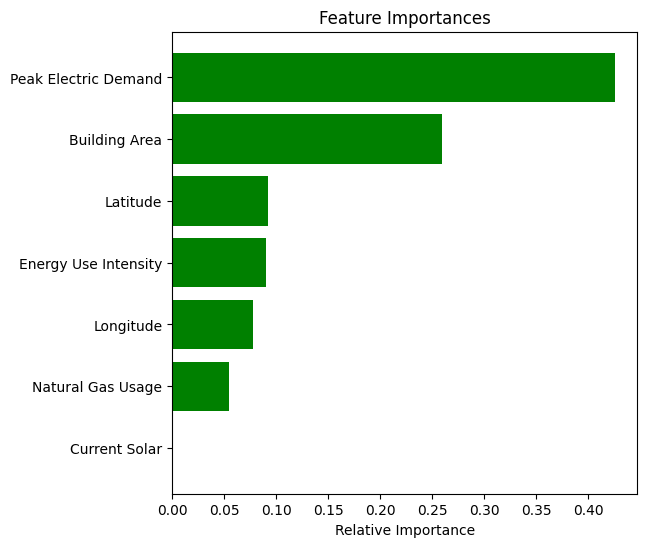

In [53]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Boosting Models

### **AdaBoost Regressor**

In [54]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [55]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared          MAPE
0  73954.747456  60371.091965   0.801529         0.79793  13091.952828


In [56]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  83727.186805  63531.907761   0.705261        0.682589  757.979399


### Hyperparameter Tuning

In [57]:
# Choose the type of regressor.
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=20, random_state=1)

In [58]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared          MAPE
0  70718.803574  46720.623471   0.818517        0.815226  11317.234391


In [60]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  80049.472919  56680.921755   0.730585        0.709861  453.134074


In [61]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Peak Electric Demand  0.723094
Building Area         0.163140
Latitude              0.044162
Energy Use Intensity  0.038614
Longitude             0.026825
Natural Gas Usage     0.004164
Current Solar         0.000000


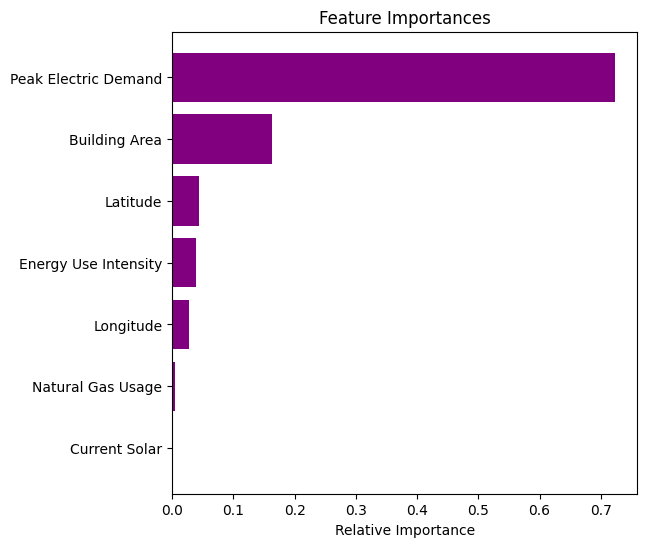

In [62]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Regressor

In [64]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [65]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared         MAPE
0  30649.806461  20501.857871   0.965911        0.965292  1898.337979


In [66]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  66338.314903  44564.667587   0.814974        0.800741  261.306958


### Hyperparameter Tuning

In [67]:
# Choose the type of regressor.
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, max_features=1, n_estimators=175,
                          random_state=1, subsample=1)

In [68]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
            RMSE          MAE  R-squared  Adj. R-squared        MAPE
0  12239.258379  7085.379495   0.994564        0.994465  742.406164


In [69]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  65791.580389  41312.284741   0.818011        0.804012  218.737266


In [70]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Peak Electric Demand  0.469609
Building Area         0.230977
Energy Use Intensity  0.118650
Latitude              0.077021
Longitude             0.058149
Natural Gas Usage     0.045594
Current Solar         0.000000


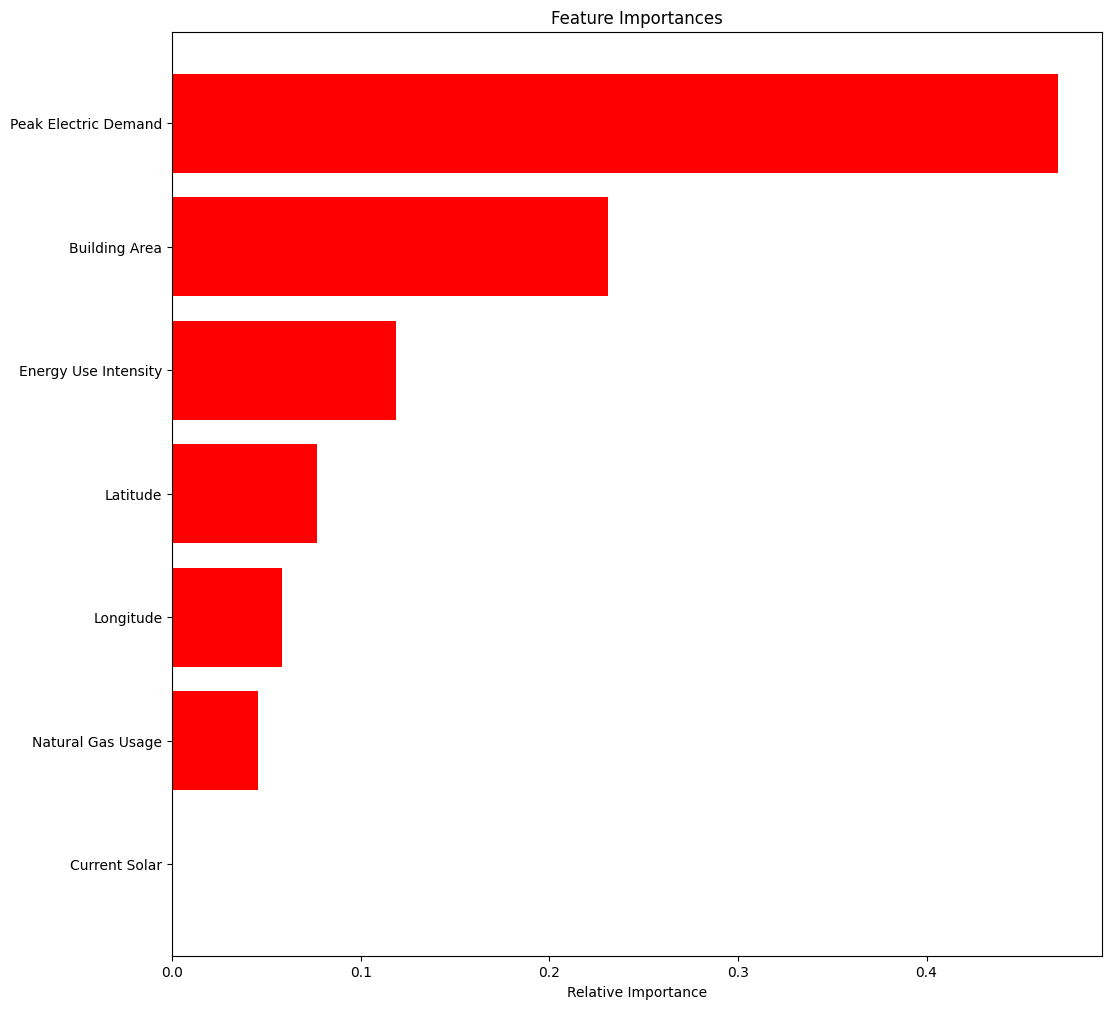

In [71]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Regressor

In [72]:
# Check for prohibited characters in column names
for col in X_train.columns:
    if '[' in col or ']' in col or '<' in col:
        print(f"Column name {col} contains prohibited characters.")

# Clean column names if necessary
X_train.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train.columns]

# Now, fit the model
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [73]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
           RMSE         MAE  R-squared  Adj. R-squared        MAPE
0  2222.341979  845.095512   0.999821        0.999818  166.360203


In [74]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
            RMSE          MAE  R-squared  Adj. R-squared        MAPE
0  61616.907691  37585.94966   0.840374        0.828095  178.485425


### Hyperparameter Tuning

In [75]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150],
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None, colsample_bytree=0.8,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=75,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [76]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
           RMSE         MAE  R-squared  Adj. R-squared        MAPE
0  3378.200146  1955.15587   0.999586        0.999578  426.052947


In [77]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  69033.555542  47362.409801   0.799633        0.784221  182.592699


In [78]:
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Building Area         0.346917
Peak Electric Demand  0.335561
Energy Use Intensity  0.151457
Longitude             0.061408
Latitude              0.053412
Natural Gas Usage     0.051245
Current Solar         0.000000


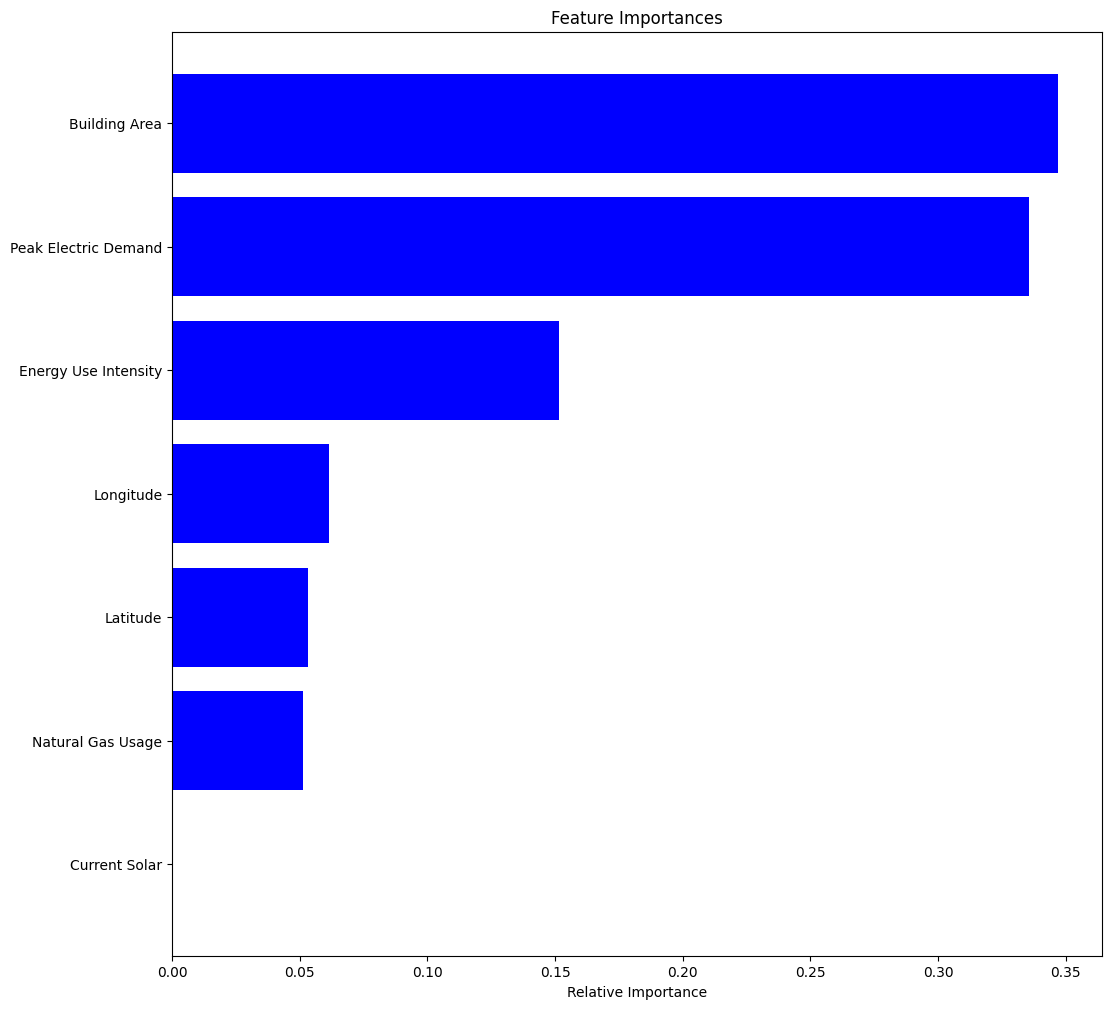

In [79]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Stacking Model
**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [80]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [81]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_impurity_decrease=0.001,
                                                     min_samples_leaf=3,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     n_estimators=90,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=5,
                                                         max_features=1,
                                                         n_estimators=175,
                                                         random...
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=1, ...))

In [82]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
           RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  44970.43696  25992.553247   0.926613        0.925282  977.726969


In [83]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
            RMSE           MAE  R-squared  Adj. R-squared        MAPE
0  74675.331477  45065.733458   0.765545         0.74751  246.822316


## Comparing all models

In [84]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking_Estimator"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking_Estimator
RMSE,0.0,46497.717637,26641.569014,30703.130138,73954.747456,70718.803574,30649.806461,12239.258379,2222.341979,3378.200146,44970.436960
MAE,0.0,22737.407177,14916.412614,19622.584692,60371.091965,46720.623471,20501.857871,7085.379495,845.095512,1955.155870,25992.553247
R-squared,1.0,0.921544,0.974244,0.965792,0.801529,0.818517,0.965911,0.994564,0.999821,0.999586,0.926613
Adj. R-squared,1.0,0.920121,0.973777,0.965171,0.797930,0.815226,0.965292,0.994465,0.999818,0.999578,0.925282
MAPE,0.0,862.918706,703.407944,2025.975222,13091.952828,11317.234391,1898.337979,742.406164,166.360203,426.052947,977.726969


In [85]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking_Estimator"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking_Estimator
RMSE,83218.219137,84337.897626,61175.941294,66306.031291,83727.186805,80049.472919,66338.314903,65791.580389,61616.907691,69033.555542,74675.331477
MAE,49993.656566,47182.197138,39624.091717,43888.390246,63531.907761,56680.921755,44564.667587,41312.284741,37585.949660,47362.409801,45065.733458
R-squared,0.708833,0.700945,0.842650,0.815154,0.705261,0.730585,0.814974,0.818011,0.840374,0.799633,0.765545
Adj. R-squared,0.686436,0.677941,0.830546,0.800935,0.682589,0.709861,0.800741,0.804012,0.828095,0.784221,0.747510
MAPE,406.952252,228.273356,280.132372,305.673123,757.979399,453.134074,261.306958,218.737266,178.485425,182.592699,246.822316


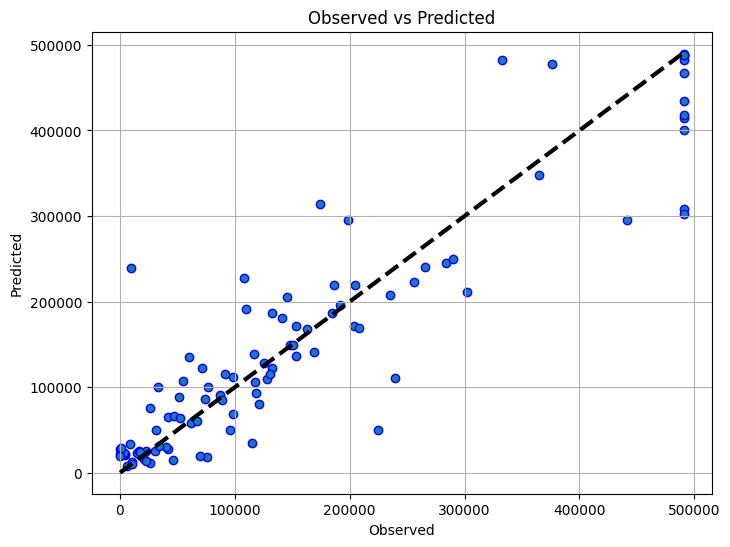

In [86]:
# So plot observed and predicted values of the test data for the best model i.e. random forest model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=rf_estimator.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

## Saving Random Forest Model For Deployment

In [87]:
import joblib
# Save the model to a .pkl file
joblib.dump(rf_estimator, 'model.pkl')

['model.pkl']